In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile as sf
import librosa
import librosa.display
import IPython.display as ipd
import os
from scipy.io import wavfile

# Configuration de matplotlib pour un meilleur affichage
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)

print("Bibliothèques importées avec succès !")

Bibliothèques importées avec succès !


In [15]:
# Paramètres d'enregistrement
fs = 16000  # Fréquence d'échantillonnage en Hz
duration = 2  # Durée d'enregistrement en secondes
channels = 1  # Mono

# Chemin pour sauvegarder les fichiers audio
data_dir = "../data/recordings"
os.makedirs(data_dir, exist_ok=True)

print(f"Paramètres : {fs} Hz, {duration} secondes, {channels} canal(aux)")

Paramètres : 16000 Hz, 2 secondes, 1 canal(aux)


In [16]:
def record_audio(duration=duration, fs=fs, channels=channels):
    """
    Enregistre l'audio avec le microphone et retourne le signal.
    
    Args:
        duration: Durée d'enregistrement en secondes
        fs: Fréquence d'échantillonnage en Hz
        channels: Nombre de canaux (1 pour mono, 2 pour stéréo)
    
    Returns:
        numpy.ndarray: Signal audio enregistré
    """
    print(f"Enregistrement de {duration} secondes...")
    
    # Countdown
    for i in range(3, 0, -1):
        print(f"{i}...")
        sd.sleep(int(500))  # Pause de 500ms
        
    print("Parlez maintenant !")
    
    # Enregistrement
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=channels, dtype='float32')
    sd.wait()  # Attendre la fin de l'enregistrement
    
    print("Enregistrement terminé !")
    return audio

In [17]:
def process_audio(audio, fs=fs):
    """
    Affiche la forme d'onde et le spectrogramme, et joue l'audio.
    
    Args:
        audio: Signal audio (numpy.ndarray)
        fs: Fréquence d'échantillonnage
    """
    # Conversion en mono si nécessaire
    if audio.ndim > 1:
        audio = audio.mean(axis=1)
        
    # Calcul de l'axe temporel
    time = np.arange(0, len(audio)) / fs
    
    # Affichage de la forme d'onde
    plt.figure(figsize=(14, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(time, audio)
    plt.title('Forme d\'onde')
    plt.xlabel('Temps (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Affichage du spectrogramme
    plt.subplot(2, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=fs, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogramme')
    
    plt.tight_layout()
    plt.show()
    
    # Lecture de l'audio
    print("Lecture de l'audio enregistré :")
    return ipd.Audio(audio, rate=fs)

In [18]:
def save_audio(audio, filename, fs=fs):
    """
    Sauvegarde l'audio au format WAV.
    
    Args:
        audio: Signal audio (numpy.ndarray)
        filename: Nom du fichier (sans extension)
        fs: Fréquence d'échantillonnage
    """
    # Chemin complet
    full_path = os.path.join(data_dir, f"{filename}.wav")
    
    # Conversion en mono si nécessaire
    if audio.ndim > 1:
        audio = audio.mean(axis=1)
    
    # Sauvegarde au format WAV
    sf.write(full_path, audio, fs)
    print(f"Audio sauvegardé dans {full_path}")
    
    return full_path

Enregistrement de 3 secondes...
3...
2...
1...
Parlez maintenant !
Enregistrement terminé !


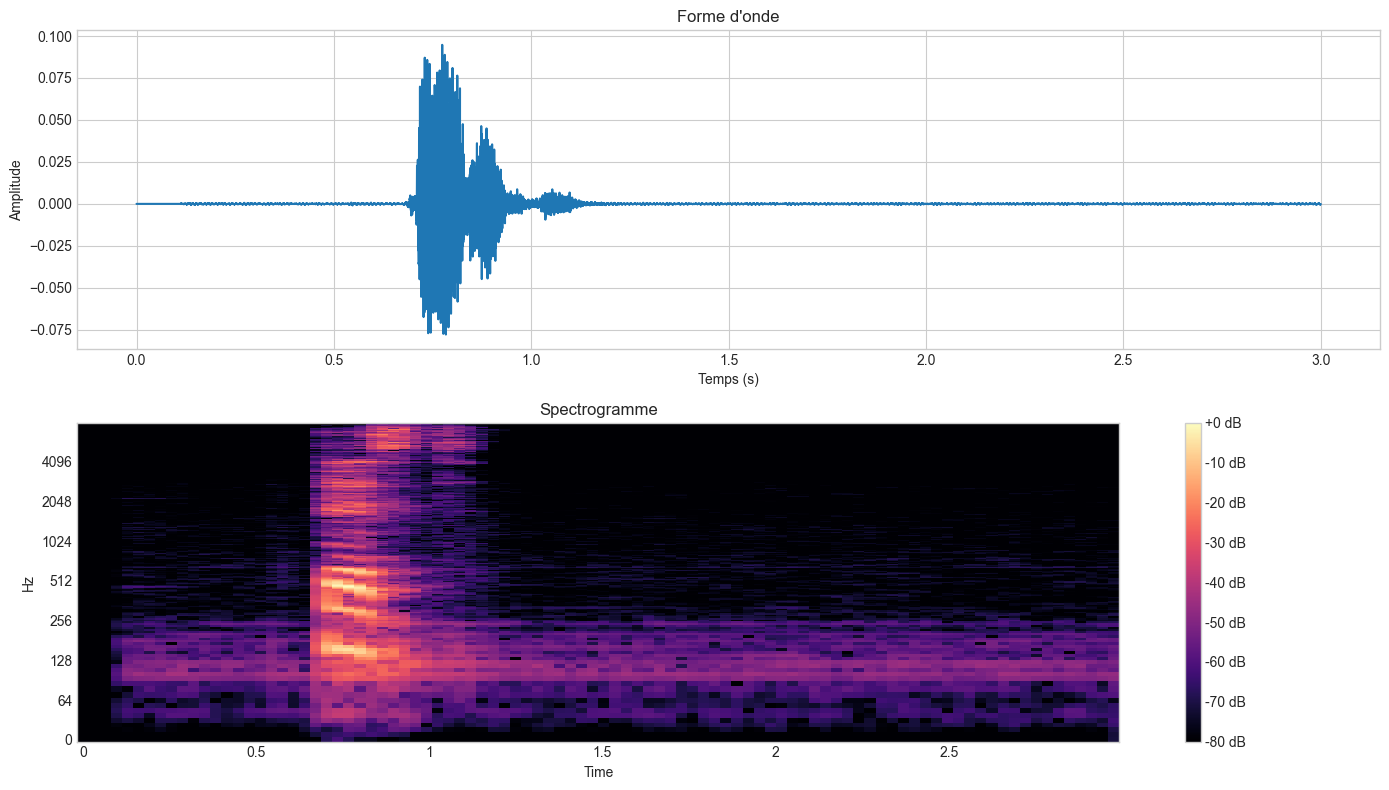

Lecture de l'audio enregistré :


Audio sauvegardé dans ../data/recordings\test_1.wav


'../data/recordings\\test_1.wav'

In [11]:
# Test complet
word = "test"  # Mot à prononcer

# Enregistrement
audio = record_audio()

# Affichage et lecture
audio_player = process_audio(audio)
display(audio_player)  # Affiche le lecteur audio

# Sauvegarde
save_audio(audio, f"{word}_1")

In [12]:
def load_and_analyze(file_path):
    """
    Charge un fichier audio, l'affiche et le joue.
    
    Args:
        file_path: Chemin vers le fichier audio
    """
    # Chargement du fichier audio
    audio, fs = librosa.load(file_path, sr=None)
    
    print(f"Fichier chargé : {file_path}")
    print(f"Durée : {len(audio)/fs:.2f} secondes")
    print(f"Taux d'échantillonnage : {fs} Hz")
    
    # Affichage et lecture
    audio_player = process_audio(audio, fs)
    display(audio_player)
    
    return audio, fs

Fichier chargé : ../data/recordings\test_1.wav
Durée : 3.00 secondes
Taux d'échantillonnage : 16000 Hz


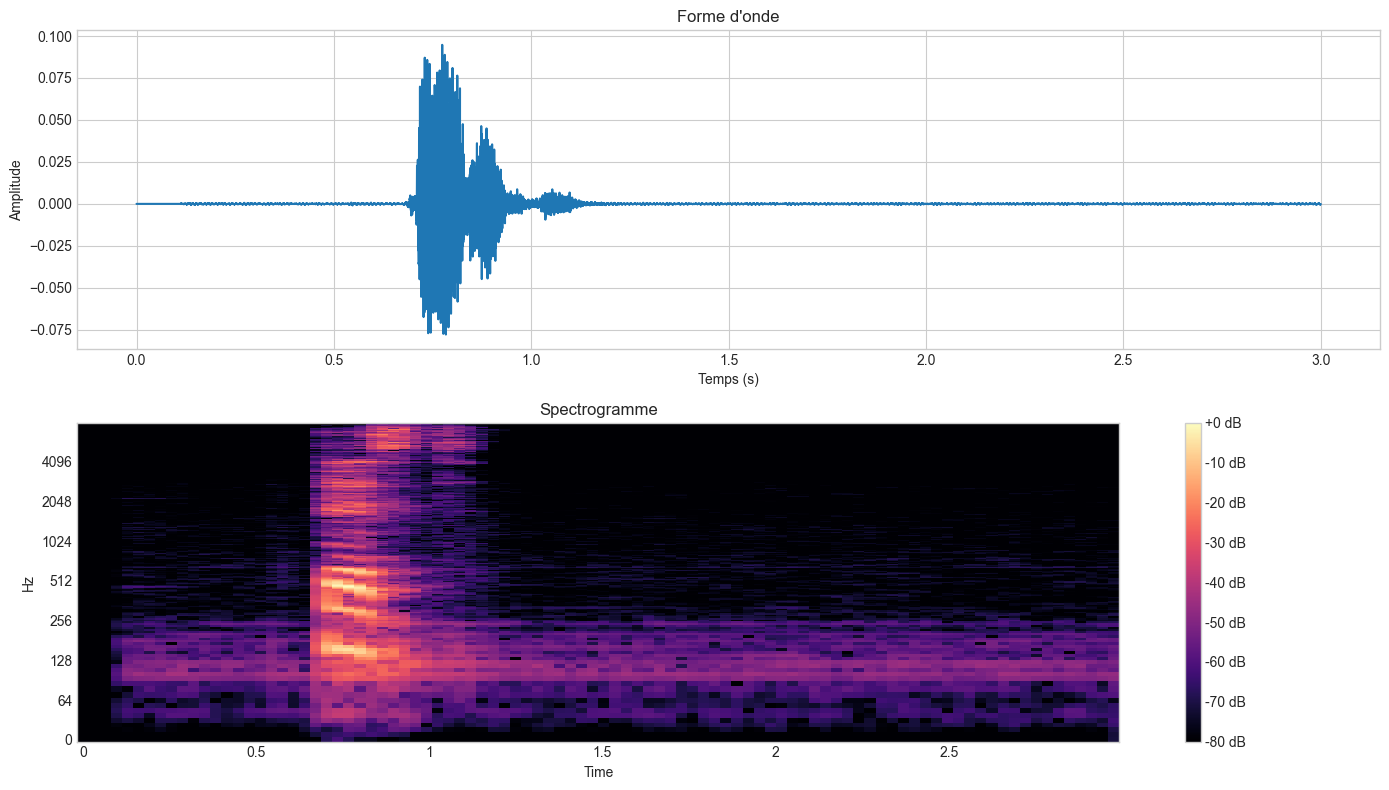

Lecture de l'audio enregistré :


In [13]:
file_path = os.path.join(data_dir, "test_1.wav")
if os.path.exists(file_path):
    audio, fs = load_and_analyze(file_path)
else:
    print(f"Le fichier {file_path} n'existe pas encore. Exécutez d'abord la cellule précédente.")

In [19]:
def extract_mfcc(audio, fs=fs, n_mfcc=13):
    """
    Extrait les coefficients MFCC (Mel-frequency cepstral coefficients).
    
    Args:
        audio: Signal audio
        fs: Fréquence d'échantillonnage
        n_mfcc: Nombre de coefficients MFCC à extraire
        
    Returns:
        numpy.ndarray: Matrice des MFCC
    """
    # Extraction des MFCC
    mfccs = librosa.feature.mfcc(y=audio, sr=fs, n_mfcc=n_mfcc)
    
    # Affichage
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(mfccs, sr=fs, x_axis='time')
    plt.colorbar(format='%+2.0f')
    plt.title(f'MFCC (Mel-frequency cepstral coefficients)')
    plt.tight_layout()
    plt.show()
    
    return mfccs

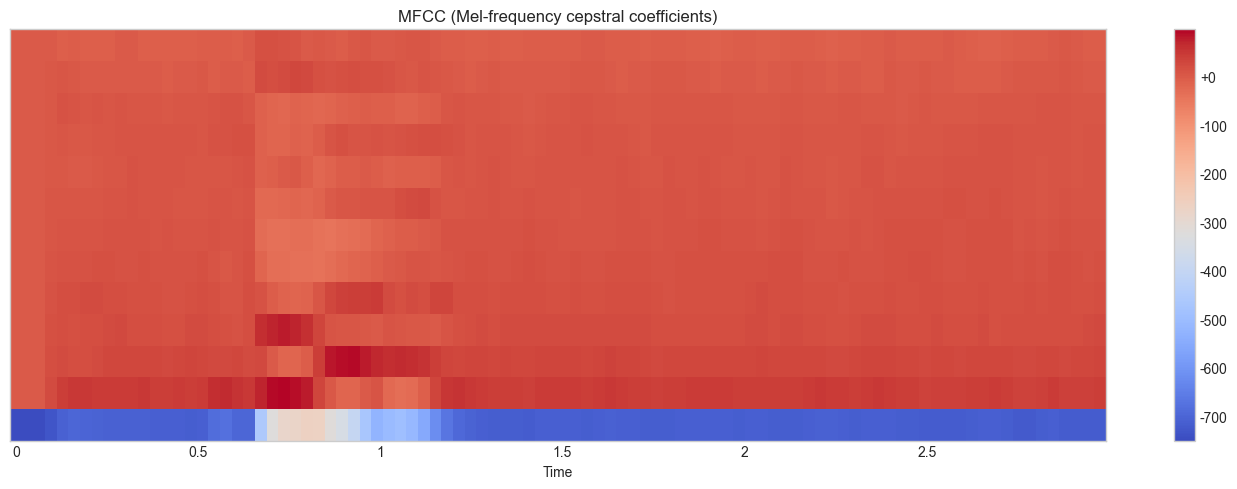

Forme des MFCC : (13, 94)
Forme de la moyenne des MFCC : (13,)


In [20]:
if 'audio' in locals():
    mfccs = extract_mfcc(audio)
    print(f"Forme des MFCC : {mfccs.shape}")
    
    # Moyenne des MFCC (utile pour créer un vecteur de caractéristiques fixe)
    mfccs_mean = np.mean(mfccs, axis=1)
    print(f"Forme de la moyenne des MFCC : {mfccs_mean.shape}")
else:
    print("Variable 'audio' non trouvée. Exécutez d'abord la cellule d'enregistrement.")

Forme des MFCC : (x, y) : L'audio a été transformé en x coefficients MFCC (caractéristiques acoustiques) sur y trames temporelles.
Forme de la moyenne des MFCC : (X,) : Extraction d'un vecteur de  valeurs qui représente de façon condensée l'ensemble de l'enregistrement.